<a href="https://colab.research.google.com/github/albernazz/Challange-oracle-one-data-science/blob/main/Challange_alura_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# URLs dos arquivos CSV das lojas
urls = {
    'Loja 1': 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv',
    'Loja 2': 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv',
    'Loja 3': 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv',
    'Loja 4': 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv'
}

# Carregando os dados em um dicionário de DataFrames
lojas = {nome: pd.read_csv(url) for nome, url in urls.items()}


In [5]:
resultados = {}

for nome, df in lojas.items():
    faturamento_total = df['Preço'].sum()
    categoria_mais_popular = df['Categoria do Produto'].value_counts().idxmax()
    media_avaliacao = df['Avaliação da compra'].mean()
    produto_mais_vendido = df['Produto'].value_counts().idxmax()
    produto_menos_vendido = df['Produto'].value_counts().idxmin()
    frete_medio = df['Frete'].mean()

    resultados[nome] = {
        'Faturamento Total': faturamento_total,
        'Categoria Mais Popular': categoria_mais_popular,
        'Média Avaliação': media_avaliacao,
        'Produto + Vendido': produto_mais_vendido,
        'Produto - Vendido': produto_menos_vendido,
        'Frete Médio': frete_medio
    }

df_resultados = pd.DataFrame(resultados).T


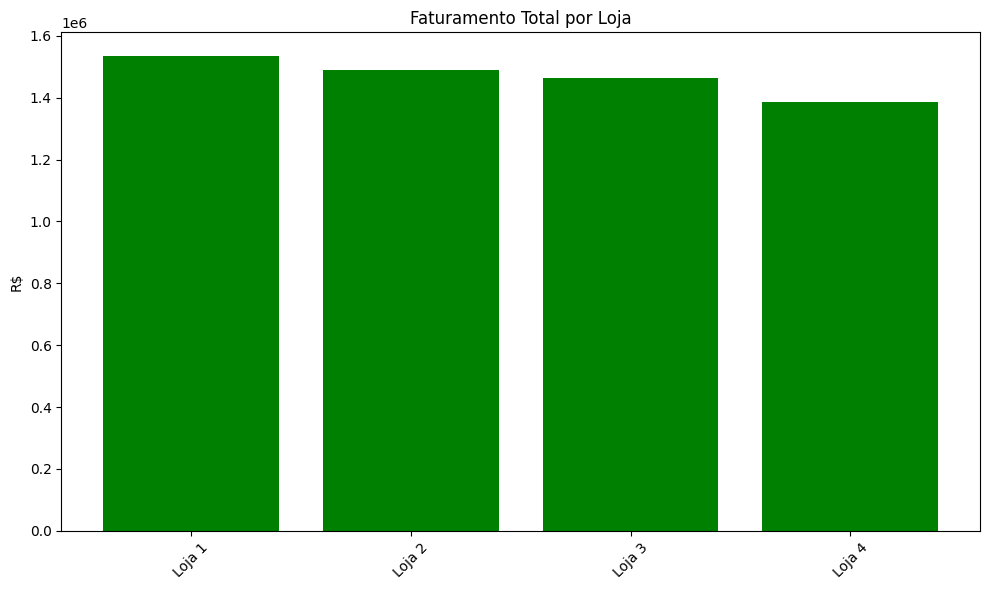

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df_resultados.index, df_resultados['Faturamento Total'], color='green')
plt.title('Faturamento Total por Loja')
plt.ylabel('R$')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


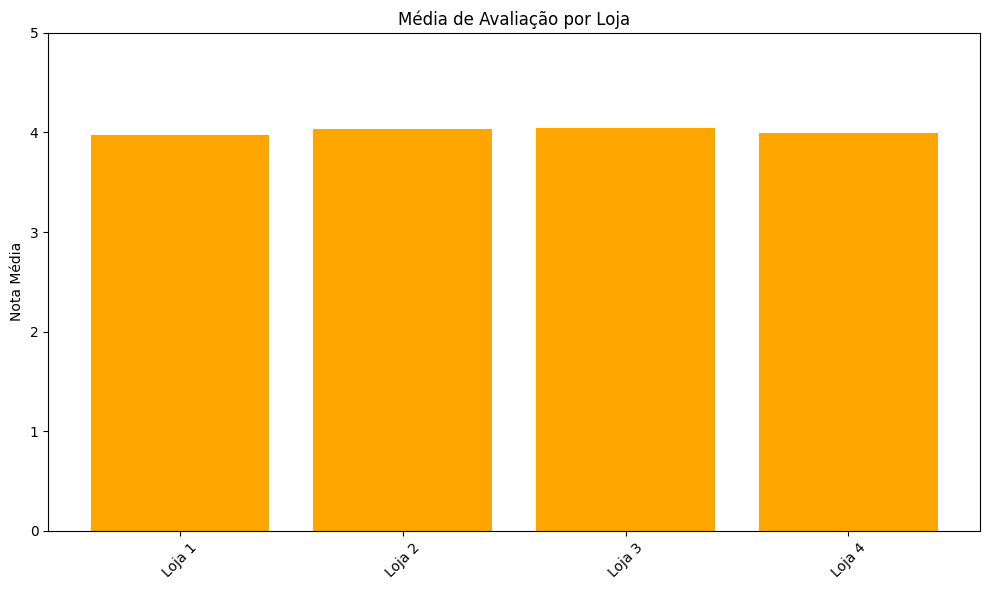

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(df_resultados.index, df_resultados['Média Avaliação'], color='orange')
plt.title('Média de Avaliação por Loja')
plt.ylabel('Nota Média')
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

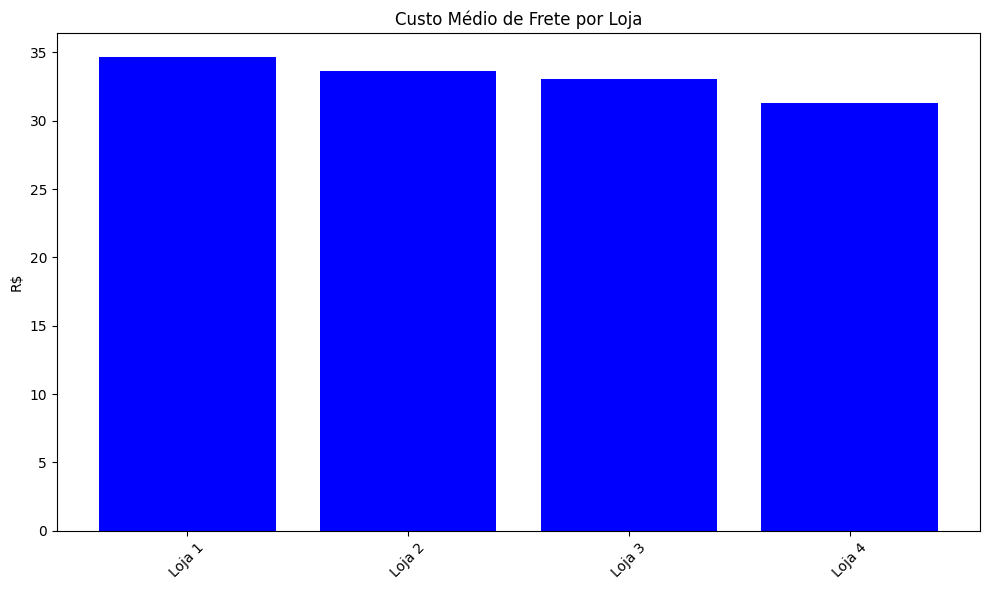

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(df_resultados.index, df_resultados['Frete Médio'], color='blue')
plt.title('Custo Médio de Frete por Loja')
plt.ylabel('R$')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
# Ordenando as lojas por faturamento total
loja_menos_rentavel = df_resultados.sort_values('Faturamento Total').iloc[0]

# Exibindo a loja com menor faturamento
print(f"A loja com menor faturamento é a {loja_menos_rentavel.name}.")
print(f"Faturamento Total: R$ {loja_menos_rentavel['Faturamento Total']:.2f}")
print(f"Média de Avaliação: {loja_menos_rentavel['Média Avaliação']:.2f}")
print(f"Frete Médio: R$ {loja_menos_rentavel['Frete Médio']:.2f}")


A loja com menor faturamento é a Loja 4.
Faturamento Total: R$ 1384497.58
Média de Avaliação: 4.00
Frete Médio: R$ 31.28
